# <u>**Final Project: Diabetes Health Indicators Classification </u>**
## G. Jake Manning  |  CSCA 5622 - Spring 2025 Session 1  |  [GitHub Repository](https://github.com/jman102/CSCA5622-Final-Project)

In [ ]:
#For the final project, you will identify a Supervised Learning problem to perform EDA and model analysis. A Jupyter notebook showing a supervised learning problem description, EDA procedure, analysis (model building and training), result, and discussion/conclusion. 

### Problem Description

Diabetes blah...
Ultimately this is a binary classification problem; if based on the features a person is pre-diabetic/diabetic or if they are not.

Behavioral Risk Factor Surveillance System

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.

### EDA Procedure

diabetes_binary_health_indicators_BRFSS2015.csv is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 21 feature variables and is not balanced.

To start, let's pull the CDC Diabetes Health Indicators data from the UC Irvine Machine Learning Repository. They have a super convenient module where you can fetch the data by a repo id and load features and targets straight into pandas dataframes. Most sources of data are not like this. But for a beginner project, I feel like data retrieval is not the emphasis, so I'll use the nice resources available.

In [21]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset | CDC Diabetes Health Indicators
## url - https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
# print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
# print(cdc_diabetes_health_indicators.variables)

In [27]:
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                253680 non-null  int64
 1   HighChol              253680 non-null  int64
 2   CholCheck             253680 non-null  int64
 3   BMI                   253680 non-null  int64
 4   Smoker                253680 non-null  int64
 5   Stroke                253680 non-null  int64
 6   HeartDiseaseorAttack  253680 non-null  int64
 7   PhysActivity          253680 non-null  int64
 8   Fruits                253680 non-null  int64
 9   Veggies               253680 non-null  int64
 10  HvyAlcoholConsump     253680 non-null  int64
 11  AnyHealthcare         253680 non-null  int64
 12  NoDocbcCost           253680 non-null  int64
 13  GenHlth               253680 non-null  int64
 14  MentHlth              253680 non-null  int64
 15  PhysHlth              253680 non-n

In [29]:
X.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


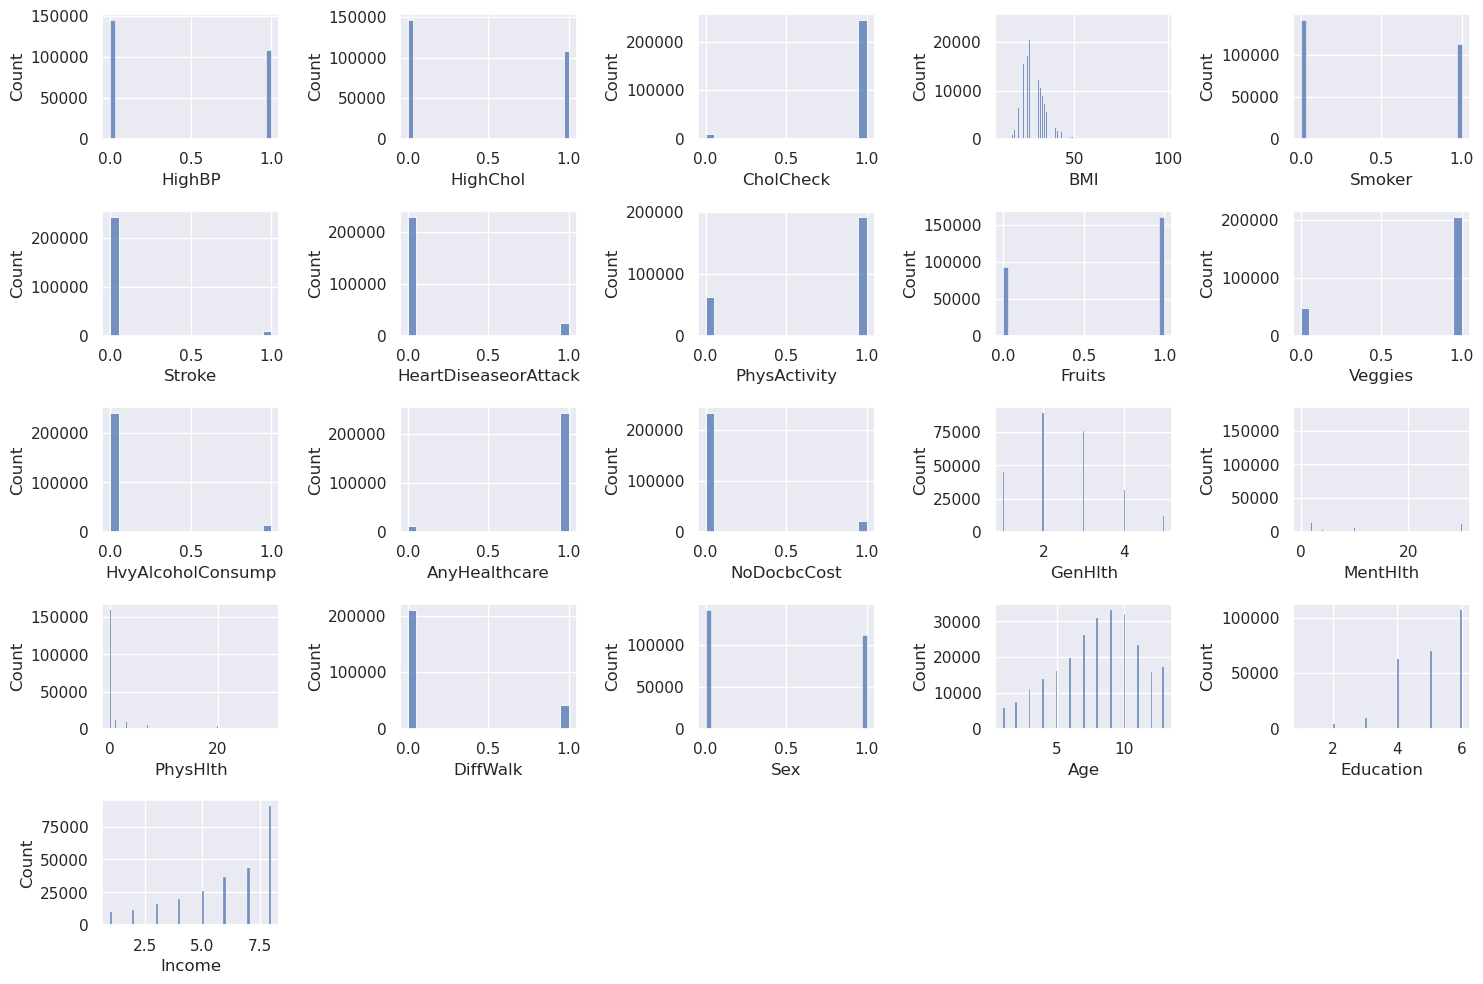

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a histogram for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[feature])
    plt.tight_layout()
plt.show()

In [30]:
y.describe()

,Diabetes_binary
count,253680.000000
mean,0.139333
std,0.346294
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Analysis: Model Building & Training

For this classification problem, there were a handful of supervised machine learning techniques that we learned in this course that could be useful. My approach is to try a few different techniques and then compare results in later sections of this notebook.

### Results

### Conclusions

### Sources

[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators)

[Kaggle Project](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data?select=diabetes_012_health_indicators_BRFSS2015.csv)

[Original Dataset Source](https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system)